# How to use pyMannKendall package functions : a brief example

Three datasets are used here for demonstrating the use of this package. the datasets are
- **Daily Female Births Dataset:** This dataset describes the number of daily female births in California in 1959. This dataset is available in [here](https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv).

- **Shampoo Sales Dataset:** This dataset describes the monthly number of sales of shampoo over 3 years. This dataset is available in [here](https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv)

-  **Air Passengers Dataset:** This famous dataset describes monthly international airline passengers (in thousands) from January 1949 to December 1960. It is widely used as a nonstationary seasonal time series.  This dataset is available in [here](https://www.kaggle.com/freespirit08/time-series-for-beginners-with-arima/data)


In [1]:
import numpy as np
import pandas as pd
import pymannkendall as mk
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

# read all datasets
Birth_data = pd.read_csv("daily-total-female-births.csv",parse_dates=['Date'],index_col='Date')
Shampoo_data = pd.read_csv("shampoo.csv",parse_dates=['Month'],index_col='Month')
Passenger_data = pd.read_csv("AirPassengers.csv",parse_dates=['Month'],index_col='Month')

## Daily Female Births Dataset

In [2]:
Birth_data.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


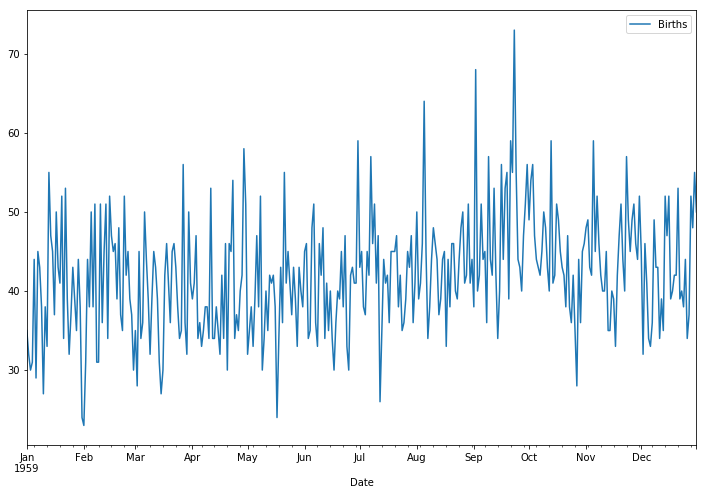

In [3]:
Birth_data.plot(figsize=(12,8));

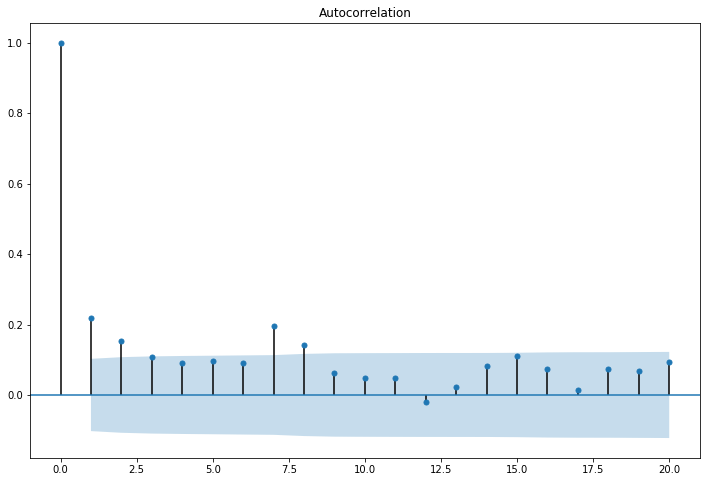

In [4]:
fig, ax = plt.subplots(figsize=(12, 8))
sm.graphics.tsa.plot_acf(Birth_data, lags=20, ax=ax);

From this ACF plot, here show slightly autocorrelation in the first lag. We can ignore it. So, in our demonstration, we *assume* that there is no autocorrelation in **Daily Female Births Dataset**. So, to check the trend in this dataset, we can use the *Original Mann Kendall test*. 

In [5]:
mk.original_test(Birth_data, alpha=0.05)

Mann_Kendall_Test(trend='increasing', h=True, p=1.144585319856617e-07, z=5.302131199455321, Tau=0.18569923227457474, s=12336.0, var_s=5412244.0, slope=0.019230769230769232)

From this result, we can say that there is a significant trend in this dataset. Because the **p-value** is smaller than **alpha=0.05** and **h=True**. The trend is **increasing** and the value of trend/slope is **0.019230769230769232**.

## Shampoo Sales Dataset

In [6]:
Shampoo_data.head()

,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


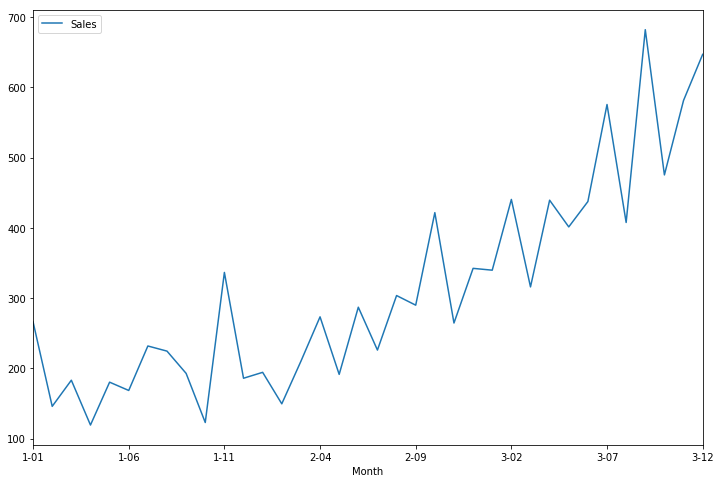

In [7]:
Shampoo_data.plot(figsize=(12,8));

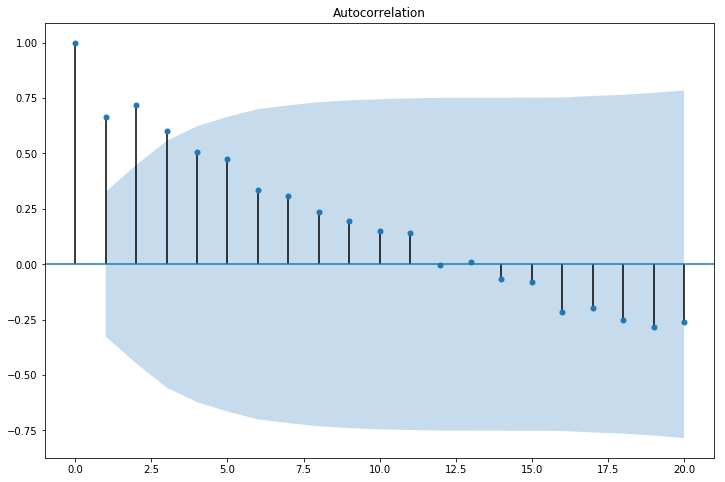

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))
sm.graphics.tsa.plot_acf(Shampoo_data, lags=20, ax=ax);

From this ACF plot, here show autocorrelation in the first lag. So, modified Mann Kendall test should be applied in here. We can use **Hamed and Rao Modified MK Test**, **Yue and Wang Modified MK Test**, **Modified MK test using Pre-Whitening method** or **Modified MK test using Trend free Pre-Whitening method** for this Shampoo Sales Dataset.

In [9]:
mk.hamed_rao_modification_test(Shampoo_data)

Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='increasing', h=True, p=2.8916160532688195e-07, z=5.130377554630905, Tau=0.6984126984126984, s=440.0, var_s=7322.011164105283, slope=11.509375)

**Hamed and Rao Modified MK Test** show that there is a significant trend in this dataset. We can check this using other modified tests.

In [10]:
mk.yue_wang_modification_test(Shampoo_data)

Modified_Mann_Kendall_Test_Yue_Wang_Approach(trend='increasing', h=True, p=4.89164264649844e-13, z=7.228299591844883, Tau=0.6984126984126984, s=440.0, var_s=3688.5591437515127, slope=11.509375)

In [11]:
mk.trend_free_pre_whitening_modification_test(Shampoo_data)

Modified_Mann_Kendall_Test_Trend_Free_PreWhitening_Approach(trend='increasing', h=True, p=1.2152931994080518e-09, z=6.078212917371978, Tau=0.7210084033613445, s=429.0, var_s=4958.333333333333, slope=12.263944666078734)

In [12]:
mk.pre_whitening_modification_test(Shampoo_data)

Modified_Mann_Kendall_Test_PreWhitening_Approach(trend='increasing', h=True, p=0.002860908222931835, z=2.982300730486251, Tau=0.3546218487394958, s=211.0, var_s=4958.333333333333, slope=5.623545987662016)

All Modified test shows that there is a **significant increasing trend**. So we are sure about this trend.

## Air Passengers Dataset

In [13]:
Passenger_data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


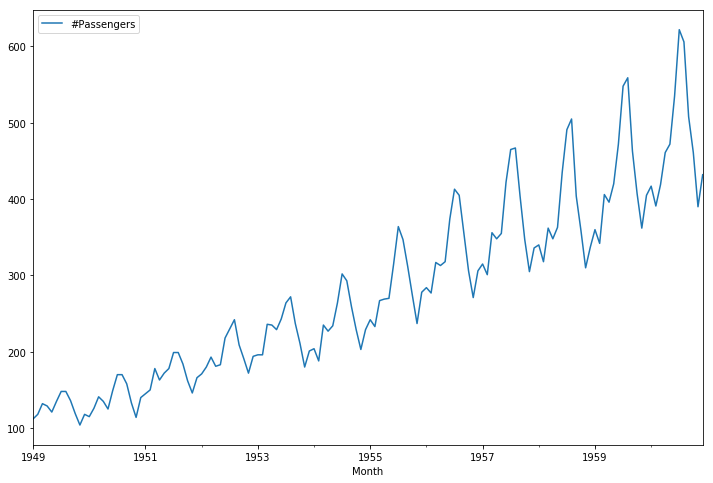

In [14]:
Passenger_data.plot(figsize=(12,8));

From this figure, we observed a noticeable seasonality. So we should use **Seasonal MK Test** for this monthly dataset. And Because of this dataset is monthly data, so here we use **period=12**.

In [15]:
mk.seasonal_test(Passenger_data,period=12)

Seasonal_Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=15.50571052301472, Tau=0.98989898989899, s=784.0, var_s=2550.0, slope=30.23611111111111)

According to the result, this dataset also has a **significant increasing trend**.